In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Dataset
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#Data Preprocessing

In [4]:
df.info

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]>

In [5]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


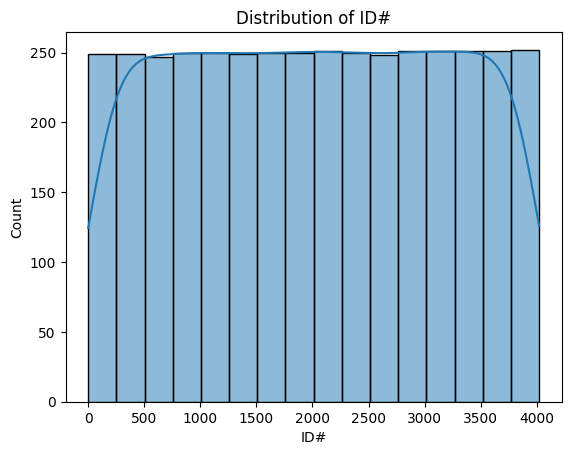

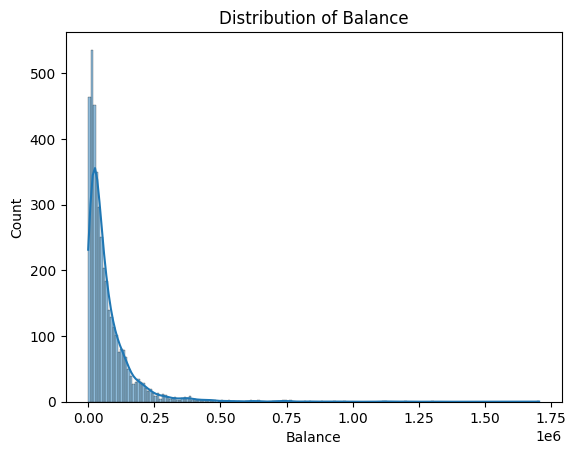

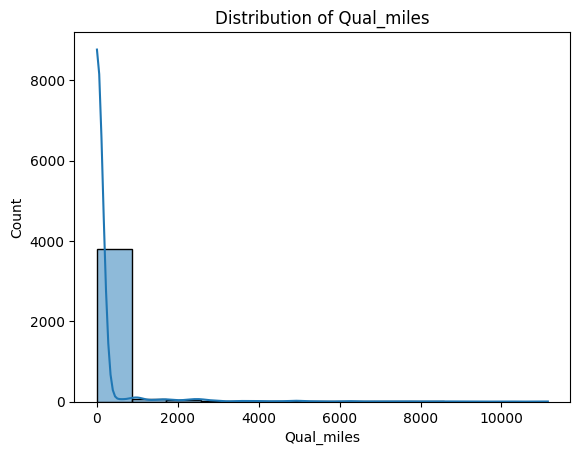

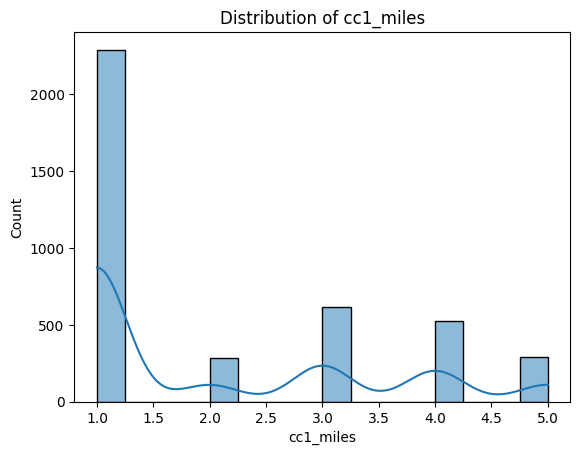

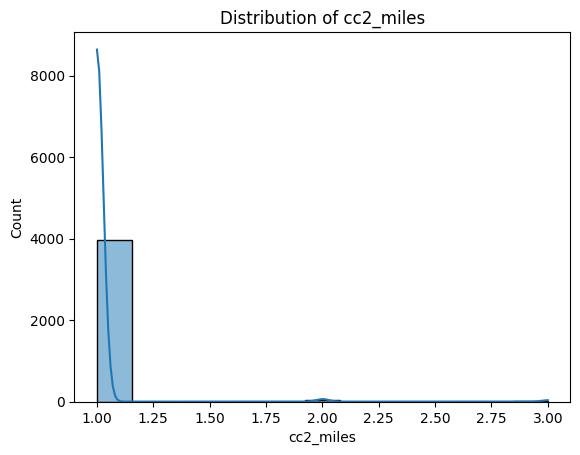

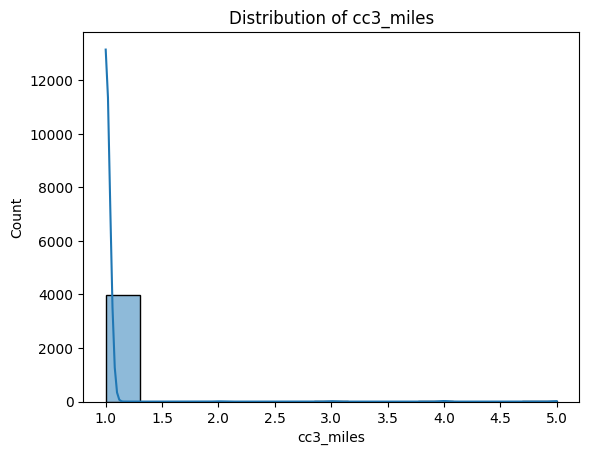

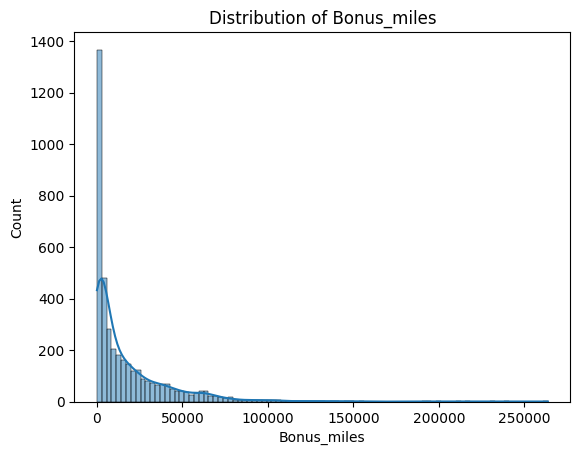

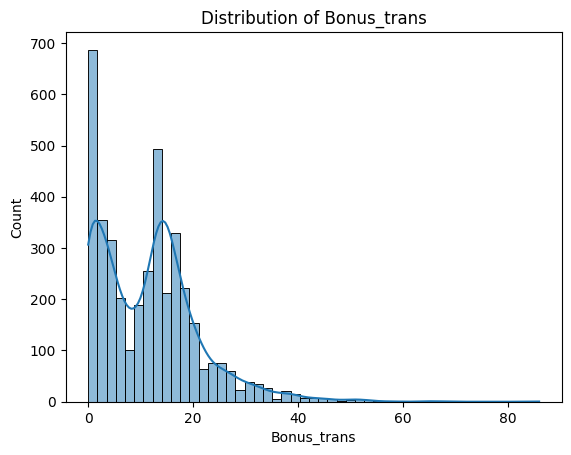

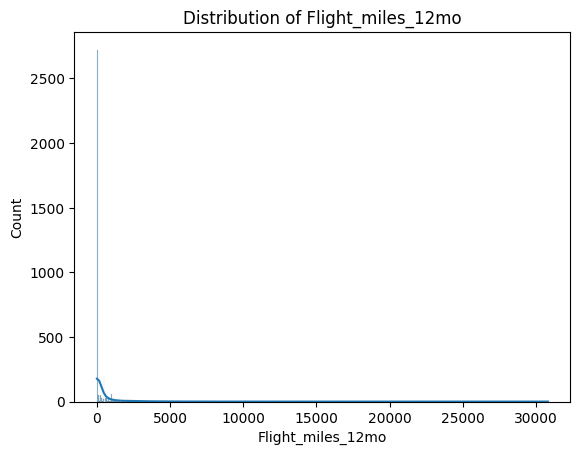

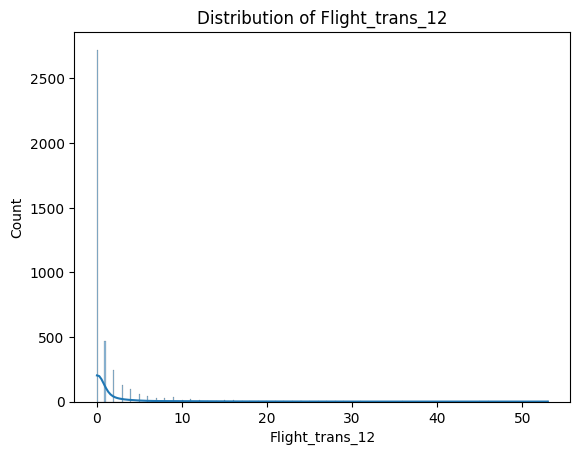

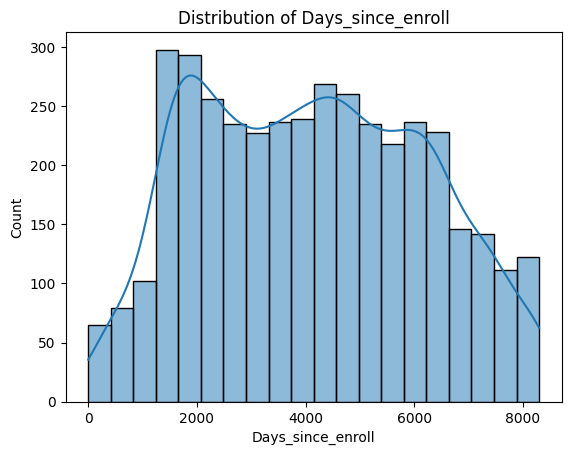

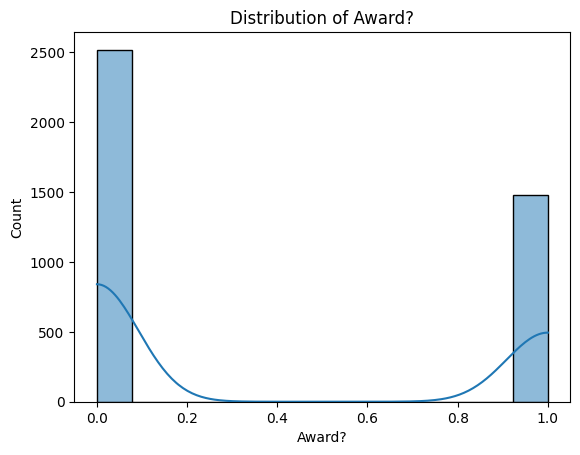

In [9]:
for column in df.columns:
  sns.histplot(df[column],kde=True)
  plt.title(f"Distribution of {column}")
  plt.show()

<Axes: >

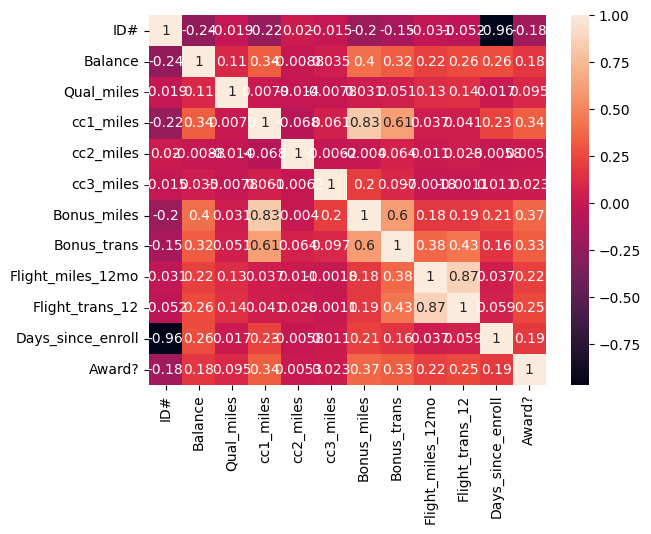

In [12]:
sns.heatmap(df.corr(),annot=True)


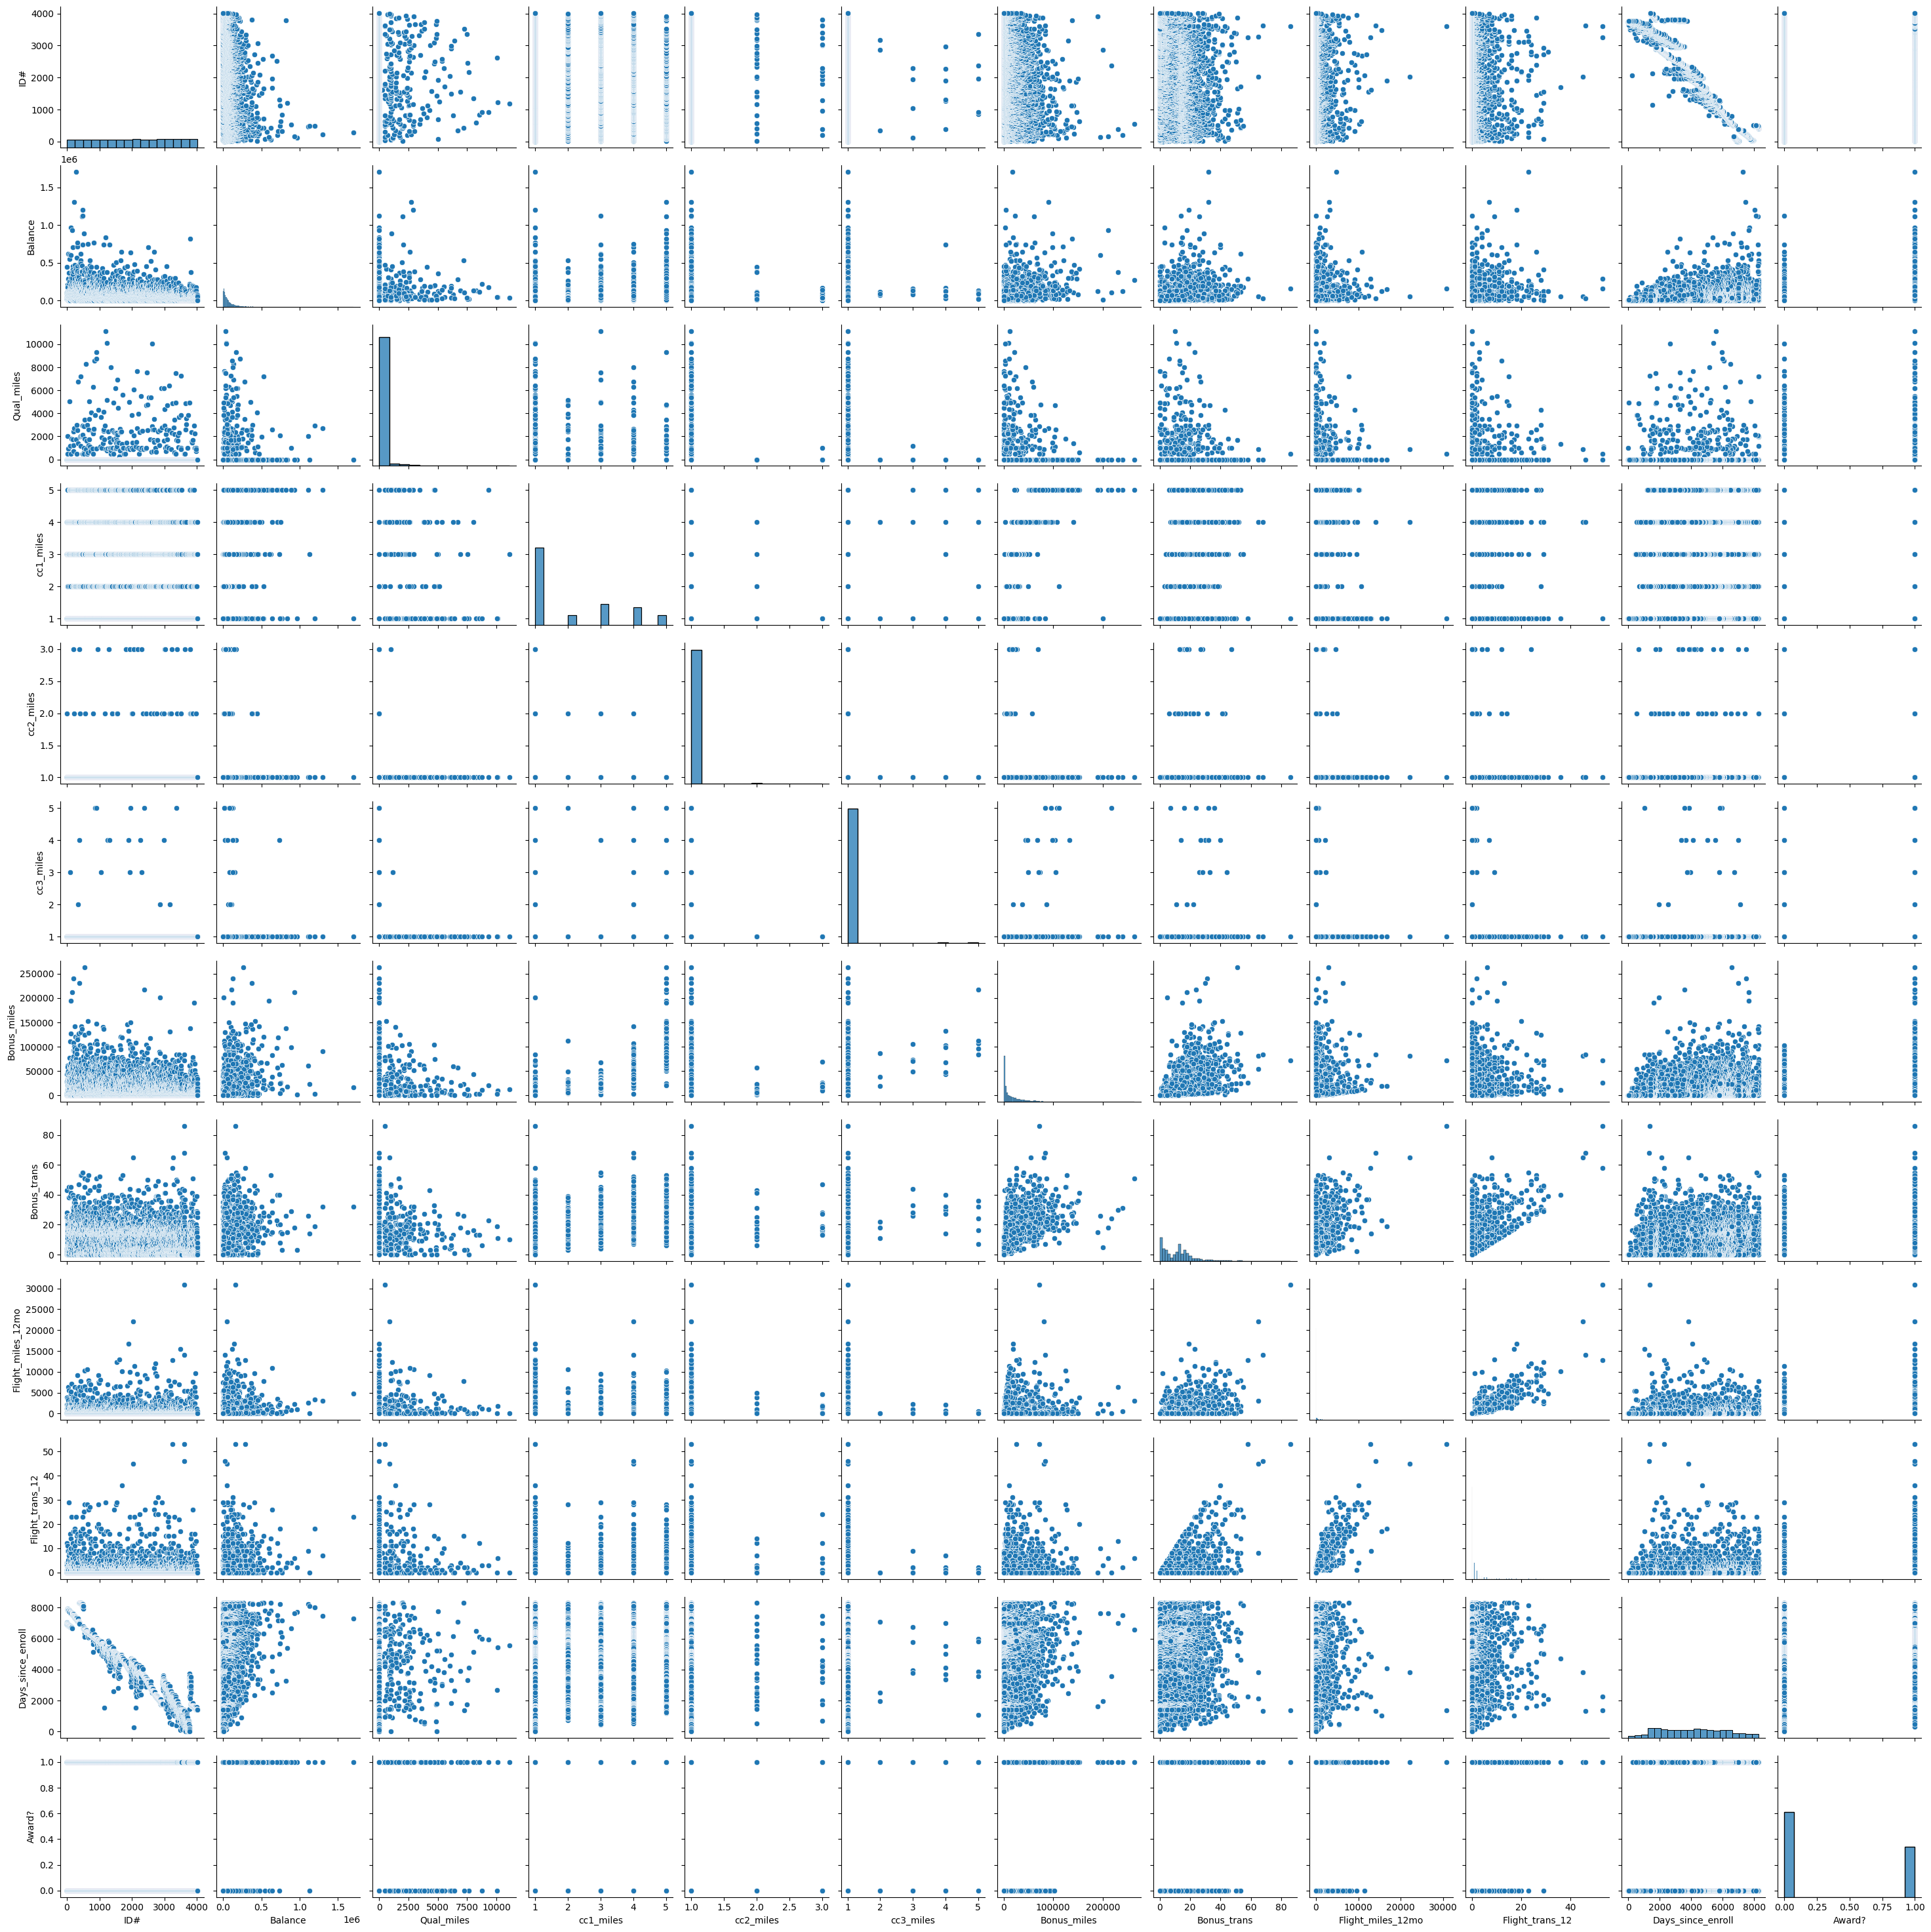

In [14]:
sns.pairplot(df)

#Removing Outliers

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [16]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

In [17]:
data = df[~((df < LL) | (df > UL)).any(axis=1)]

In [18]:
data.shape

(2875, 12)

#Standardizing Features Dataset

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data.drop(columns=['ID#','Award?']))

#Implementing Herarchical Clustring

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

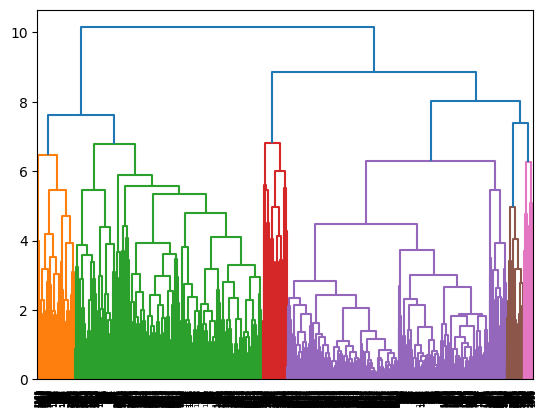

In [25]:
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method = 'complete'))

In [32]:
hc = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [33]:
y_hc = hc.fit_predict(scaled_data)
y_hc

array([3, 3, 3, ..., 0, 1, 3])

#Implementing KMeans Clustring

In [34]:
from sklearn.cluster import KMeans
inertia = []

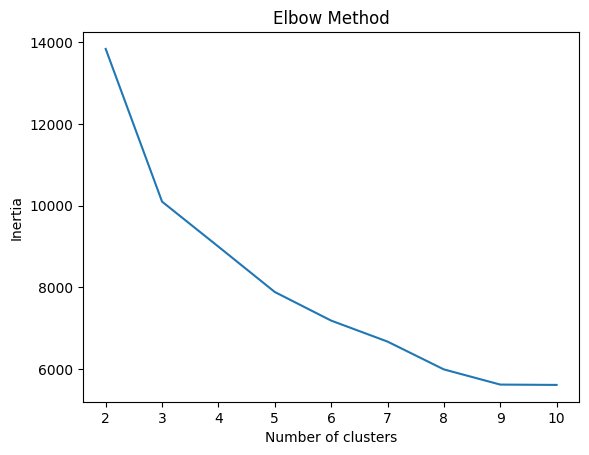

In [35]:
# Plotting Elbow Method
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,11),inertia)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [40]:
kc = KMeans(n_clusters=3)
kc.fit(scaled_data)
kc.labels_

array([2, 2, 2, ..., 1, 0, 2], dtype=int32)

#Implementing DBSCAN Clustring

In [41]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps=1.5,min_samples=15)
dbscan.fit(scaled_data)
dbscan.labels_

array([0, 0, 0, ..., 0, 1, 0])

#Cluster Summary

In [44]:
data['KMeans_Cluster'] = kc.labels_
data['HC_Cluster'] = y_hc
data['DBSCAN_Cluster'] = dbscan.labels_

In [45]:
cluster_summary =data.groupby('KMeans_Cluster').mean()
print(cluster_summary)

                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2026.685792  64459.016393         0.0   2.027322        1.0   
1               1787.323113  75658.156840         0.0   3.208726        1.0   
2               2299.698977  28245.478025         0.0   1.082480        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  14113.125683    11.704918         418.737705   
1                     1.0  25119.430425    16.207547           6.070755   
2                     1.0   2885.607465     5.391933           3.440096   

                Flight_trans_12  Days_since_enroll    Award?  HC_Cluster  \
KMeans_Cluster                                                             
0                      1.297814        4103.459016  0.434426    1.603825   


#Visualizing Clustering Results

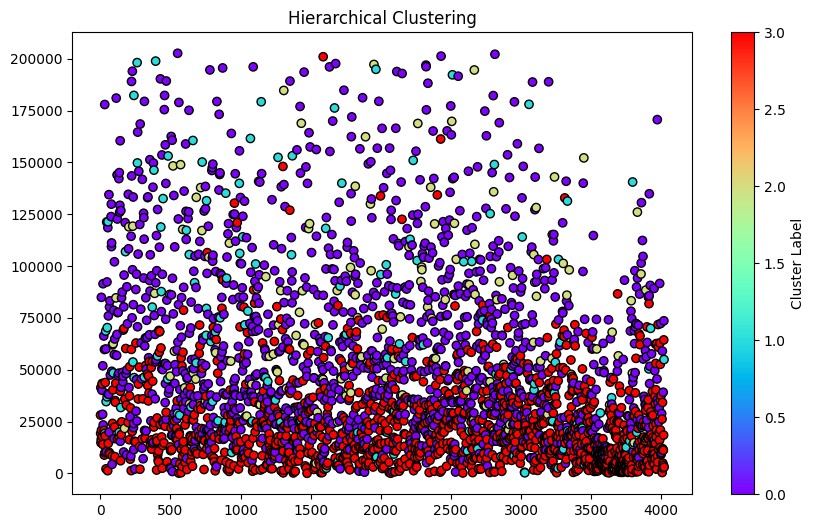

In [46]:
# Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=hc.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

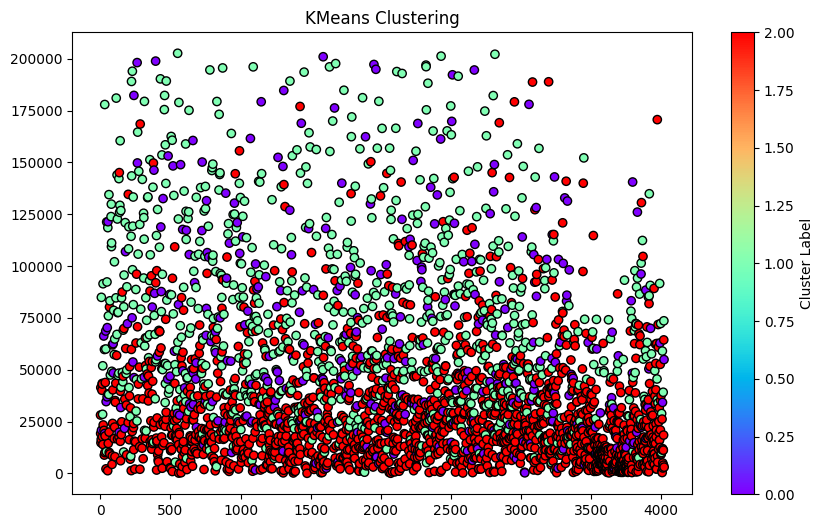

In [47]:
# KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kc.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

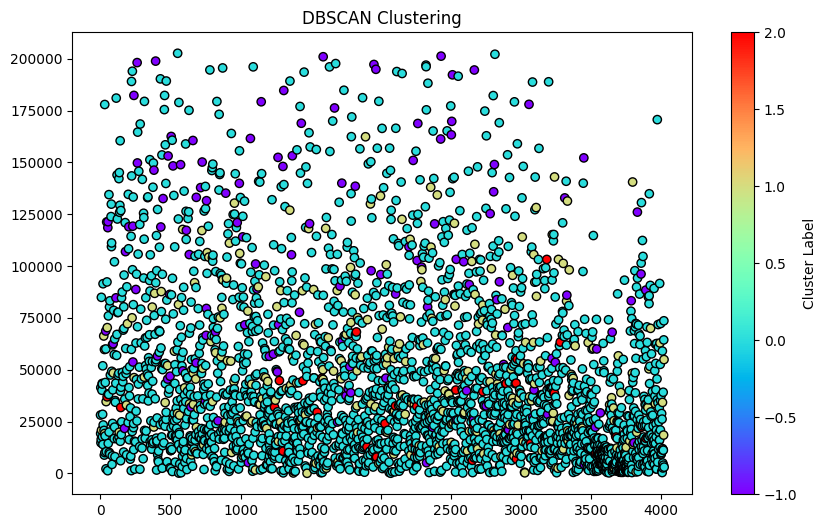

In [48]:
# DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=dbscan.labels_, cmap='rainbow', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

#Evaluation and Perfomance Metrics

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
print(f"Silhouette Score of Hierarchical Clustering : {silhouette_score(scaled_data,hc.labels_)}")
print(f"Silhouette Score of KMeans Clustering : {silhouette_score(scaled_data,kc.labels_)}")
print(f"Silhouette Score of DBSCAN Clustering : {silhouette_score(scaled_data,dbscan.labels_)}")

Silhouette Score of Hierarchical Clustering : 0.27054517533967365
Silhouette Score of KMeans Clustering : 0.37767569215882935
Silhouette Score of DBSCAN Clustering : 0.30581265272485747
